### 온/오프라인쇼핑몰 운영형태별 상품군별 거래액 크롤링

In [64]:
from urllib.request import urlopen

from bs4 import BeautifulSoup
import requests 

import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"


In [71]:
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [65]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')


In [49]:
shopping=bs_obj.find(id='htmlGrid')
shopping

<div class="inner" id="htmlGrid"></div>

In [69]:
df=pd.read_csv('./Data/온라인쇼핑몰/온라인쇼핑몰_운영형태별_상품군별거래액_2019~202106.csv',index_col=0,encoding='euc-kr')
df.head(3)

,운영형태별,2019. 01,2019. 02,2019. 03,2019. 04,2019. 05,2019. 06,2019. 07,2019. 08,2019. 09,...,2020. 09,2020. 10,2020. 11,2020. 12,2021. 01,2021. 02,2021. 03,2021. 04,2021. 05 p),2021. 06 p)
상품군별,,,,,,,,,,,,,,,,,,,,,
합계,계,10811796,9666871,11296239,10763785,11374817,10725166,11302975,11418155,11397646,...,13857627,13884207,15031417,15891202,15069277,13915804,15954632,15136515,16096176,15655839
합계,Online몰,7077518,6358921,7521298,7155780,7719682,7192558,7597305,7687987,7625283,...,10100853,10121126,10974443,11859561,11140521,10403719,11725917,11357518,11917578,11439209
합계,On/Offline몰,3734278,3307950,3774941,3608006,3655135,3532609,3705670,3730168,3772363,...,3756774,3763081,4056974,4031641,3928756,3512084,4228715,3778997,4178599,4216630


In [119]:
df.transpose()
df.T

상품군별,합계,합계,합계,가전·전자·통신기기,가전·전자·통신기기,가전·전자·통신기기,사무·문구,사무·문구,사무·문구,의복,...,e쿠폰서비스,음식서비스,음식서비스,음식서비스,기타서비스,기타서비스,기타서비스,기타,기타,기타
운영형태별,계,Online몰,On/Offline몰,계,Online몰,On/Offline몰,계,Online몰,On/Offline몰,계,...,On/Offline몰,계,Online몰,On/Offline몰,계,Online몰,On/Offline몰,계,Online몰,On/Offline몰
2019. 01,10811796,7077518,3734278,1063081,798938,264142,79764,61798,17966,1107321,...,5497,621909,587627,34281,97802,60993,36809,223939,181164,42775
2019. 02,9666871,6358921,3307950,982059,751814,230245,71208,54979,16229,959743,...,3962,614963,584917,30046,77885,43066,34820,221598,195424,26174
2019. 03,11296239,7521298,3774941,1324884,997448,327436,81741,65119,16622,1238235,...,4220,694509,664510,29999,78986,42941,36045,327742,296110,31632
2019. 04,10763785,7155780,3608006,1134227,846372,287854,80638,63303,17335,1204083,...,4138,686320,656802,29518,79595,42187,37408,195957,162335,33622
2019. 05,11374817,7719682,3655135,1296165,987212,308952,72149,56306,15843,1278281,...,6054,742382,711023,31359,90207,51010,39196,195838,167140,28698
2019. 06,10725166,7192558,3532609,1177804,920633,257171,63607,49628,13979,1133621,...,5545,774478,740268,34210,87966,52265,35701,161668,135987,25681
2019. 07,11302975,7597305,3705670,1230419,957882,272538,69488,53735,15753,1139671,...,6008,828915,792745,36170,96756,59226,37530,182308,155167,27141
2019. 08,11418155,7687987,3730168,1198465,948590,249875,69003,53013,15989,912495,...,4042,917005,878561,38444,129122,92820,36302,203535,172847,30688
2019. 09,11397646,7625283,3772363,1096363,878344,218020,69440,55170,14270,1187128,...,4280,854892,820824,34068,174802,143079,31722,192953,160907,32046


상품군별,합계,합계,합계,가전·전자·통신기기,가전·전자·통신기기,가전·전자·통신기기,사무·문구,사무·문구,사무·문구,의복,...,e쿠폰서비스,음식서비스,음식서비스,음식서비스,기타서비스,기타서비스,기타서비스,기타,기타,기타
운영형태별,계,Online몰,On/Offline몰,계,Online몰,On/Offline몰,계,Online몰,On/Offline몰,계,...,On/Offline몰,계,Online몰,On/Offline몰,계,Online몰,On/Offline몰,계,Online몰,On/Offline몰
2019. 01,10811796,7077518,3734278,1063081,798938,264142,79764,61798,17966,1107321,...,5497,621909,587627,34281,97802,60993,36809,223939,181164,42775
2019. 02,9666871,6358921,3307950,982059,751814,230245,71208,54979,16229,959743,...,3962,614963,584917,30046,77885,43066,34820,221598,195424,26174
2019. 03,11296239,7521298,3774941,1324884,997448,327436,81741,65119,16622,1238235,...,4220,694509,664510,29999,78986,42941,36045,327742,296110,31632
2019. 04,10763785,7155780,3608006,1134227,846372,287854,80638,63303,17335,1204083,...,4138,686320,656802,29518,79595,42187,37408,195957,162335,33622
2019. 05,11374817,7719682,3655135,1296165,987212,308952,72149,56306,15843,1278281,...,6054,742382,711023,31359,90207,51010,39196,195838,167140,28698
2019. 06,10725166,7192558,3532609,1177804,920633,257171,63607,49628,13979,1133621,...,5545,774478,740268,34210,87966,52265,35701,161668,135987,25681
2019. 07,11302975,7597305,3705670,1230419,957882,272538,69488,53735,15753,1139671,...,6008,828915,792745,36170,96756,59226,37530,182308,155167,27141
2019. 08,11418155,7687987,3730168,1198465,948590,249875,69003,53013,15989,912495,...,4042,917005,878561,38444,129122,92820,36302,203535,172847,30688
2019. 09,11397646,7625283,3772363,1096363,878344,218020,69440,55170,14270,1187128,...,4280,854892,820824,34068,174802,143079,31722,192953,160907,32046


In [127]:
df=df.iloc[:3,:].T

In [128]:
df

상품군별,합계,합계,합계
운영형태별,계,Online몰,On/Offline몰
2019. 01,10811796,7077518,3734278
2019. 02,9666871,6358921,3307950
2019. 03,11296239,7521298,3774941
2019. 04,10763785,7155780,3608006
2019. 05,11374817,7719682,3655135
2019. 06,10725166,7192558,3532609
2019. 07,11302975,7597305,3705670
2019. 08,11418155,7687987,3730168
2019. 09,11397646,7625283,3772363


In [202]:
df.columns=['년도','총매출','Online 매출','Offline 매출']
df

,년도,총매출,Online 매출,Offline 매출
0,2019. 01,10811796,7077518,3734278
1,2019. 02,9666871,6358921,3307950
2,2019. 03,11296239,7521298,3774941
3,2019. 04,10763785,7155780,3608006
4,2019. 05,11374817,7719682,3655135
5,2019. 06,10725166,7192558,3532609
6,2019. 07,11302975,7597305,3705670
7,2019. 08,11418155,7687987,3730168
8,2019. 09,11397646,7625283,3772363
9,2019. 10,12008033,7987096,4020937


df=df.drop(['운영형태별'], axis=0)
df

In [157]:
df=df.reset_index()
df

,index,총합계,Online,Offline
0,2019. 01,10811796,7077518,3734278
1,2019. 02,9666871,6358921,3307950
2,2019. 03,11296239,7521298,3774941
3,2019. 04,10763785,7155780,3608006
4,2019. 05,11374817,7719682,3655135
5,2019. 06,10725166,7192558,3532609
6,2019. 07,11302975,7597305,3705670
7,2019. 08,11418155,7687987,3730168
8,2019. 09,11397646,7625283,3772363
9,2019. 10,12008033,7987096,4020937


In [172]:
df=df.rename(columns={'index':'년도'})
df

,년도,총합계,Online,Offline
0,2019. 01,10811796,7077518,3734278
1,2019. 02,9666871,6358921,3307950
2,2019. 03,11296239,7521298,3774941
3,2019. 04,10763785,7155780,3608006
4,2019. 05,11374817,7719682,3655135
5,2019. 06,10725166,7192558,3532609
6,2019. 07,11302975,7597305,3705670
7,2019. 08,11418155,7687987,3730168
8,2019. 09,11397646,7625283,3772363
9,2019. 10,12008033,7987096,4020937


In [173]:
df2019=df.loc[0:11]

In [174]:
df2020=df.loc[12:23]

In [175]:
df2021=df.loc[24:29]

In [176]:
df2019
df2020
df2021

,년도,총합계,Online,Offline
0,2019. 01,10811796,7077518,3734278
1,2019. 02,9666871,6358921,3307950
2,2019. 03,11296239,7521298,3774941
3,2019. 04,10763785,7155780,3608006
4,2019. 05,11374817,7719682,3655135
5,2019. 06,10725166,7192558,3532609
6,2019. 07,11302975,7597305,3705670
7,2019. 08,11418155,7687987,3730168
8,2019. 09,11397646,7625283,3772363
9,2019. 10,12008033,7987096,4020937


,년도,총합계,Online,Offline
12,2020. 01,12308866,8278433,4030433
13,2020. 02,11945935,8494352,3451583
14,2020. 03,12575341,9191063,3384279
15,2020. 04,12053828,8842272,3211556
16,2020. 05,12748344,9432291,3316052
17,2020. 06,12678358,9155837,3522521
18,2020. 07,12966841,9539829,3427013
19,2020. 08,13496390,9921490,3574900
20,2020. 09,13857627,10100853,3756774
21,2020. 10,13884207,10121126,3763081


,년도,총합계,Online,Offline
24,2021. 01,15069277,11140521,3928756
25,2021. 02,13915804,10403719,3512084
26,2021. 03,15954632,11725917,4228715
27,2021. 04,15136515,11357518,3778997
28,2021. 05 p),16096176,11917578,4178599
29,2021. 06 p),15655839,11439209,4216630


## 이제 시각화하기! ( 주말에 해볼게욤)

<Figure size 720x432 with 0 Axes>

Text(0.5, 0, '월')

Text(0, 0.5, '온라인쇼핑몰매출')

<BarContainer object of 12 artists>

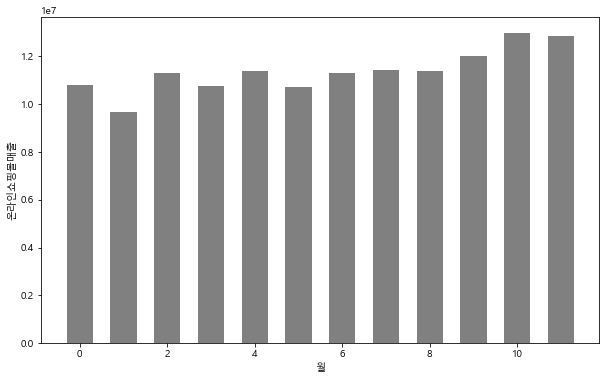

In [215]:
x=df2019.index.to_list()
y=df2019['총합계'].to_list()

plt.figure(figsize=(10,6))
plt.xlabel('월')
plt.ylabel('온라인쇼핑몰매출')

plt.bar(x,y,width=0.6,color='grey')